In [41]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [34]:
def get_variable(stat_obj,k):
    return [i[k] for i in stat_obj]

def visualize_stats(stat_obj):
    thresholds = get_variable(stat_obj,0)
    percentage_of_nodes = get_variable(stat_obj,2)
    percentage_of_edges = get_variable(stat_obj,4)
    number_of_connected_components = get_variable(stat_obj,-1)
    normalized_connected_components = [100*i/max(number_of_connected_components) for i in number_of_connected_components]
    plt.plot(thresholds,percentage_of_nodes)
    plt.plot(thresholds,percentage_of_edges)
    plt.plot(thresholds,normalized_connected_components)

In [35]:
path="stats_4"
res_alloc_naive=pickle.load(open(f"{path}/resource_allocation_naive_stats.pkl","rb"))
simple_disparity_filter=pickle.load(open(f"{path}/simple_disparity_filter_stats.pkl","rb"))
simple_noise_corrected=pickle.load(open(f"{path}/simple_noise_corrected_stats.pkl","rb"))

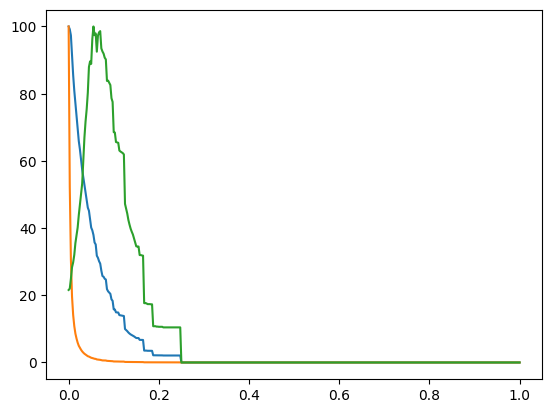

In [36]:
visualize_stats(res_alloc_naive)

In [56]:
perc_edges=get_variable(res_alloc_naive,4)
perc_edges=[i/100 for i in perc_edges]
thresholds=get_variable(res_alloc_naive,0)

dists=[]
for t,e in zip(thresholds,perc_edges):
    dist = np.sqrt(t**2+e**2)
    dists.append(dist)

optimal_threshold = thresholds[np.argmin(dists)]

In [73]:
optimal_threshold

0.034999999999999996

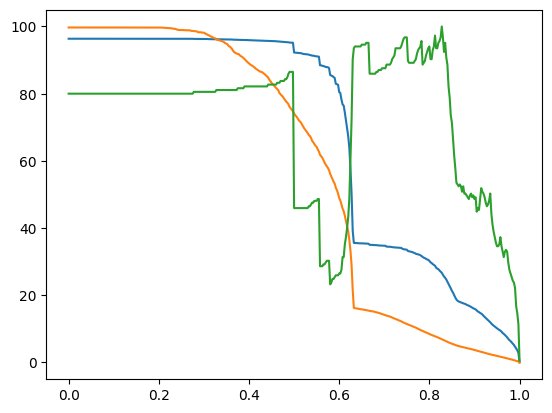

In [32]:
visualize_stats(simple_disparity_filter)

In [ ]:
# take two best thresholds
# first threhold is the dip
thresholds = get_variable(simple_disparity_filter,0)
number_of_connected_components = get_variable(simple_disparity_filter,-1)
normalized_connected_components = [i/max(number_of_connected_components) for i in number_of_connected_components]
prev_nc=normalized_connected_components[0]
t1=None
nc1=None
for t,nc in zip(thresholds,normalized_connected_components):
    if prev_nc-nc>=0.1:
        t1=t
        nc1=nc
        break
# second threhold is the min value before t=0.6
t2=None
nc2=None
min_nc=1.0
for t,nc in zip(thresholds,normalized_connected_components):
    if nc<min_nc:
        min_nc=nc
        t2=t
        nc2=nc
    if t>=0.6:
        break


0.5000000000000003

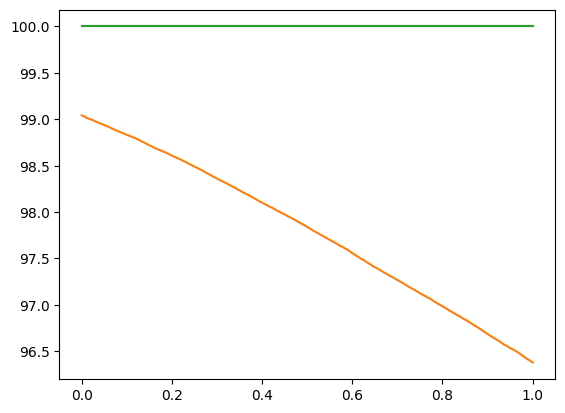

In [33]:
visualize_stats(simple_noise_corrected)